<a href="https://colab.research.google.com/github/anhdt061091/TensorFlow/blob/master/kernel2124d35f29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents:
1. Introduction
2. Librarys
3. Knowning the data
4. Exploring some Variables
5. Preprocessing
6. Modelling
7. Validation

# **1**. **Introduction**

#### The data have 891 entries on train dataset and 418 on test dataset

> 10 columns in train_csv and 9 columns in train_test

### Data Dictionary

##### Variable Definition Key
##### **survival** Survival 0 = No, 1 = Yes
##### **pclass** Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
##### **sex** Sex
##### **Age** Age in years
##### **sibsp** # of siblings / spouses aboard the Titanic
##### **parch** # of parents / children aboard the Titanic
##### **ticket** Ticket number
##### **fare** Passenger fare
##### **cabin** Cabin number
##### **embarked** Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

##### **pclass**: A proxy for socio-economic status (SES)
##### 1st = Upper
##### 2nd = Middle
##### 3rd = Lower
##### **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
##### **sibsp**: The dataset defines family relations in this way...
##### **Sibling** = brother, sister, stepbrother, stepsister
##### **Spouse** = husband, wife (mistresses and fiancés were ignored)
##### **parch**: The dataset defines family relations in this way...

##### **Parent** = mother, father
##### **Child** = daughter, son, stepdaughter, stepson
##### Some children travelled only with a nanny, therefore parch=0 for them.

# 2 Librarys

In [ ]:
#This librarys is to work with matrices
import pandas as pd 
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re

# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size 
rcParams['figure.figsize'] = 10,8

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing train dataset
df_train = pd.read_csv("https://raw.githubusercontent.com/anhdt061091/data-science/master/train.csv")

# Importing test dataset
df_test = pd.read_csv("https://raw.githubusercontent.com/anhdt061091/data-science/master/test.csv")

# 3. Knowning the data

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Looking data format and types
print(df_train.info())

# printing test info()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [ ]:
#Some Statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Take a look at the data
print(df_train.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


# 4. Exploring some Variables

In [ ]:
#Looking how the data is and searching for a re patterns
df_train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

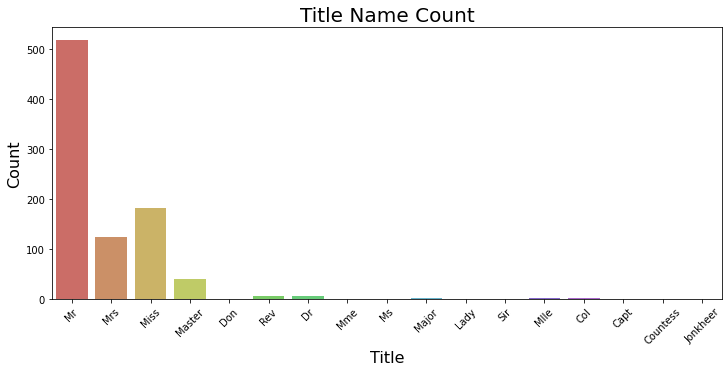

In [ ]:
#GettingLooking the prefix of all Passengers
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

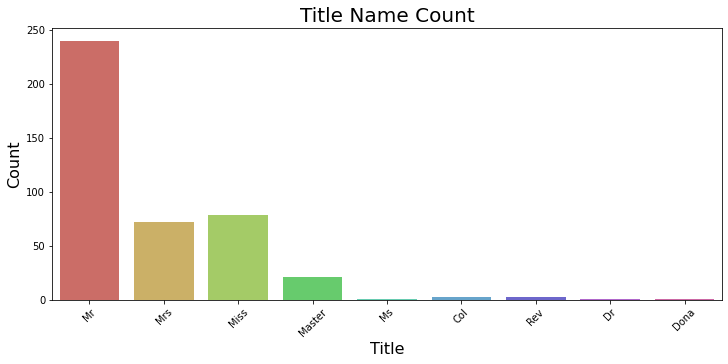

In [ ]:
#Doing the same on df_test with regular expressions
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=df_test, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

### **Grouping some titles and ploting the results**

In [ ]:
#Now, I will identify the social status of each title

Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

### **Title grouped**

Chances to survive based on titles: 
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


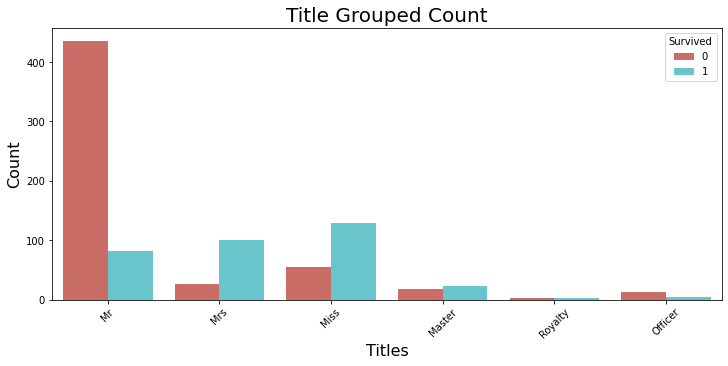

In [ ]:
#printing the chance to survive by each title
print("Chances to survive based on titles: ") 
print(df_train.groupby("Title")["Survived"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='Title', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

#### **Handle null parameters**

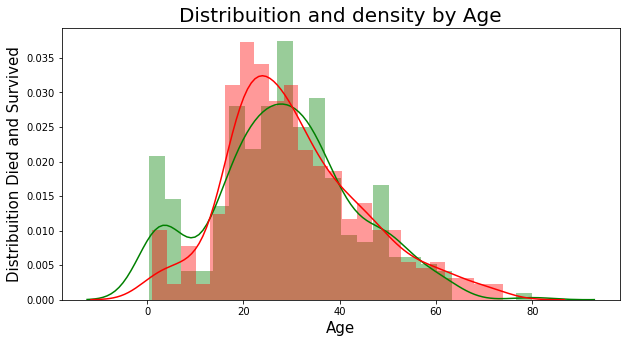

In [ ]:
#First I will look my distribuition without NaN's
#I will create a df to look distribuition 
age_high_zero_died = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 0)]
age_high_zero_surv = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 1)]

#figure size
plt.figure(figsize=(10,5))

# Ploting the 2 variables that we create and compare the two
sns.distplot(age_high_zero_surv["Age"], bins=24, color='g')
sns.distplot(age_high_zero_died["Age"], bins=24, color='r')
plt.title("Distribuition and density by Age",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Distribuition Died and Survived",fontsize=15)
plt.show()

In [ ]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age Null's
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]
print(age_group)
#printing the variabe that we created by median
print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


##### This might show us a better way to input the Null

For example: an male in 2 class that is a Officer the median Age is 42.
And we will use that to complete the missing data

In [ ]:
#inputing the values on Age Null's 
# using the groupby to transform this variables
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

# printing the total of nulls in Age Feature
print(df_train["Age"].isnull().sum())

0


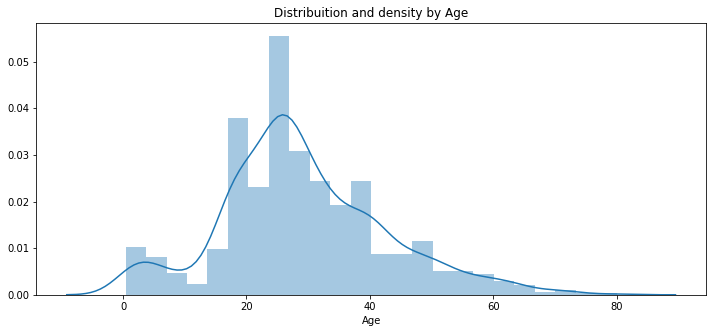

In [ ]:
#Let's see the result of the inputation

#seting the figure size
plt.figure(figsize=(12,5))

#ploting again the Age Distribuition after the transformation in our dataset
sns.distplot(df_train["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x360 with 0 Axes>

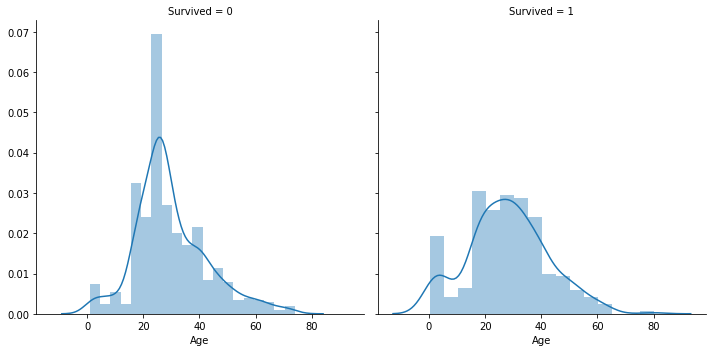

In [ ]:
#separate by survivors or not

# figure size
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(df_train, col='Survived',size=5)
g = g.map(sns.distplot, "Age")
plt.show()

##### **Now let's categorize them**

In [ ]:
#df_train.Age = df_train.Age.fillna(-0.5)

#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

#Seting the names that we want use to the categorys
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Applying the pd.cut and using the parameters that we created 
df_train["Age_cat"] = pd.cut(df_train.Age, interval, labels=cats)

# Printing the new Category
df_train["Age_cat"].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]

In [ ]:
#Do the same to test dataset 
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#same as the other df train
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# same that we used above in df train
df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)

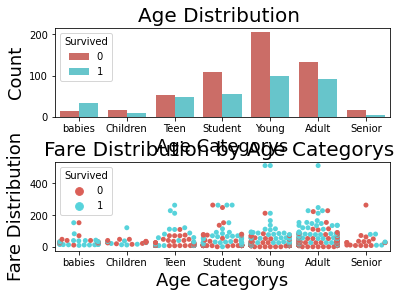

In [ ]:
#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Age_cat",data=df_train,hue="Survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x='Age_cat',y="Fare",data=df_train,
              hue="Survived", palette="hls", )
plt.ylabel("Fare Distribution", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Fare Distribution by Age Categorys ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

#### **Let's cross our Pclass with the Age_cat**
We will aggregate than to get the mean of Fare by each category pair

In [ ]:
Age_fare = ['Pclass', 'Age_cat'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[Age_fare[0]], df_train[Age_fare[1]], 
            values=df_train['Fare'], aggfunc=['mean']).style.background_gradient(cmap = cm)

##### **Looking the Fare distribuition to survivors and not survivors**

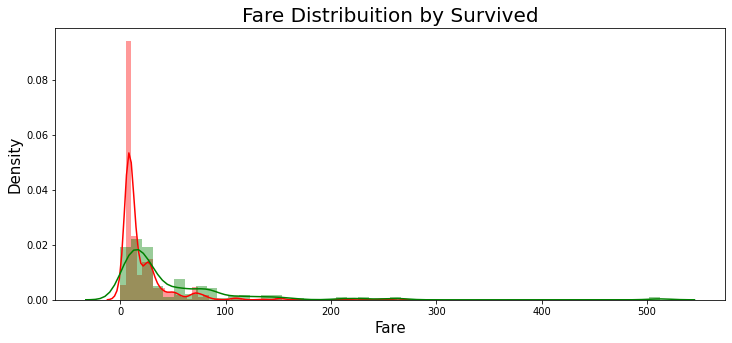

In [ ]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

#### Description of Fare variable


*   Min: 0
*   Median: 14.45
*   Mean: 32.20
*   Max: 512.32
*   Std: 49.69

I will create a categorical variable to treat the Fare expend



Survived    0    1
Fare_cat          
NoInf      14    1
quart_1   175   51
quart_2   155   62
quart_3   112   99
quart_4    93  129


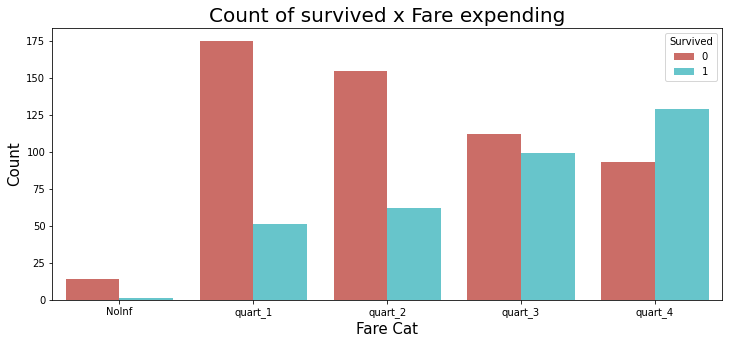

In [ ]:
#Filling the NA's with -0.5
df_train.Fare = df_train.Fare.fillna(-0.5)

#intervals to categorize
quant = (-1, 0, 8, 15, 31, 600)

#Labels without input values
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

#doing the cut in fare and puting in a new column
df_train["Fare_cat"] = pd.cut(df_train.Fare, quant, labels=label_quants)

#Description of transformation
print(pd.crosstab(df_train.Fare_cat, df_train.Survived))

plt.figure(figsize=(12,5))

#Plotting the new feature
sns.countplot(x="Fare_cat", hue="Survived", data=df_train, palette="hls")
plt.title("Count of survived x Fare expending",fontsize=20)
plt.xlabel("Fare Cat",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

In [ ]:
# Replicate the same to df_test
df_test.Fare = df_test.Fare.fillna(-0.5)

quant = (-1, 0, 8, 15, 31, 1000)
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

df_test["Fare_cat"] = pd.cut(df_test.Fare, quant, labels=label_quants)

#### **To complete this part, I will now work on "Names"**

In [ ]:
#Now lets drop the variable Fare, Age and ticket that is irrelevant now
del df_train["Fare"]
del df_train["Ticket"]
del df_train["Age"]
del df_train["Cabin"]
del df_train["Name"]

#same in df_test
del df_test["Fare"]
del df_test["Ticket"]
del df_test["Age"]
del df_test["Cabin"]
del df_test["Name"]

In [ ]:
#Looking the result of transformations
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_cat,Fare_cat
0,1,0,3,male,1,0,S,Mr,Student,quart_1
1,2,1,1,female,1,0,C,Mrs,Adult,quart_4
2,3,1,3,female,0,0,S,Miss,Young,quart_1
3,4,1,1,female,1,0,S,Mrs,Young,quart_4
4,5,0,3,male,0,0,S,Mr,Young,quart_2


Total of Survived or not: 
Survived
0    549
1    342
Name: PassengerId, dtype: int64


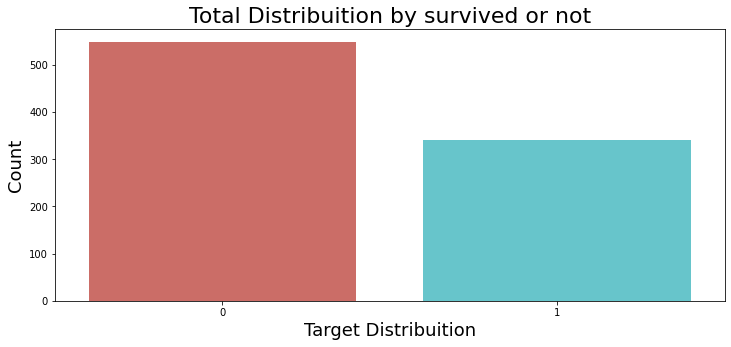

In [ ]:
# Let see how many people die or survived
print("Total of Survived or not: ")
print(df_train.groupby("Survived")["PassengerId"].count())

plt.figure(figsize=(12,5))

sns.countplot(x="Survived", data=df_train,palette="hls")
plt.title('Total Distribuition by survived or not', fontsize=22)
plt.xlabel('Target Distribuition', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


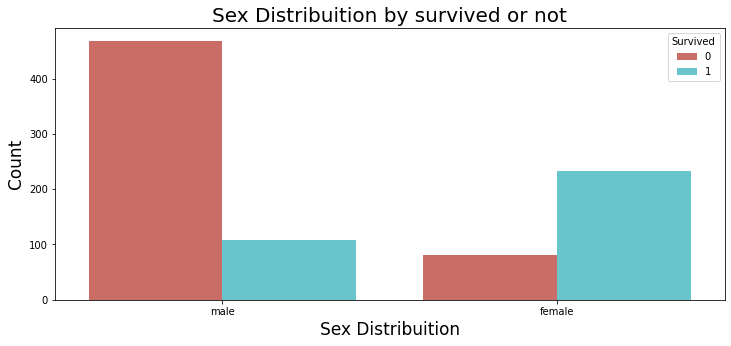

In [ ]:
print(pd.crosstab(df_train.Survived, df_train.Sex))

plt.figure(figsize=(12,5))
sns.countplot(x="Sex", data=df_train, hue="Survived",palette="hls")
plt.title('Sex Distribuition by survived or not', fontsize=20)
plt.xlabel('Sex Distribuition',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

## **Now, lets do some exploration in Pclass and Embarked to see if might have some information to build the model**

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


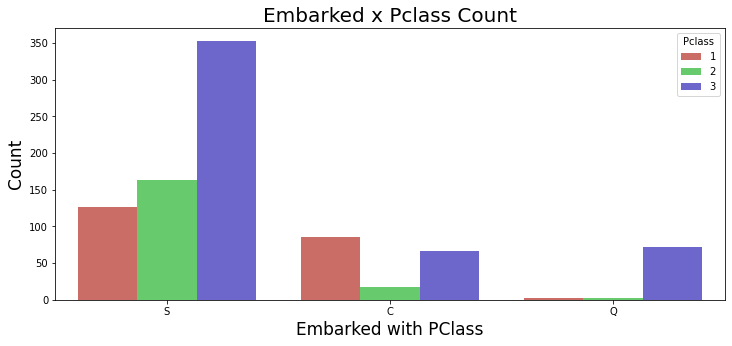

In [ ]:
# Distribuition by class
print(pd.crosstab(df_train.Pclass, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Pclass",palette="hls")
plt.title('Embarked x Pclass Count', fontsize=20)
plt.xlabel('Embarked with PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

In [ ]:
#lets input the NA's with the highest frequency
df_train["Embarked"] = df_train["Embarked"].fillna('S')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


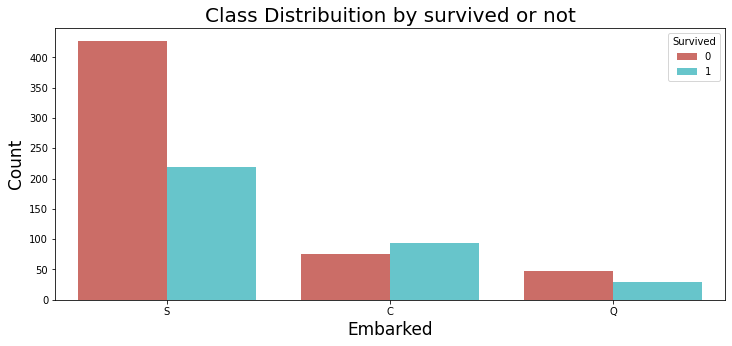

In [ ]:
# Exploring Survivors vs Embarked
print(pd.crosstab(df_train.Survived, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not',fontsize=20)
plt.xlabel('Embarked',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


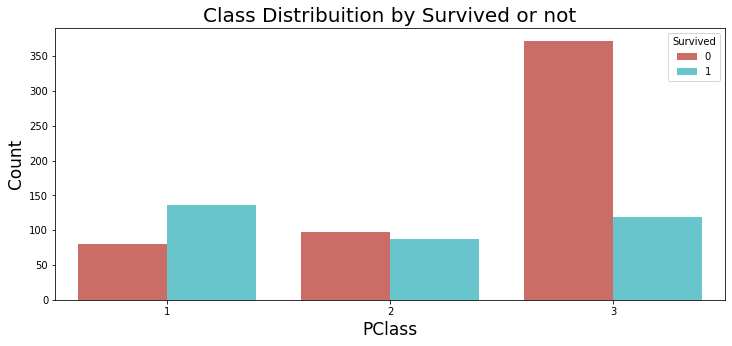

In [ ]:
# Exploring Survivors vs Pclass
print(pd.crosstab(df_train.Survived, df_train.Pclass))

plt.figure(figsize=(12,5))

sns.countplot(x="Pclass", data=df_train, hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


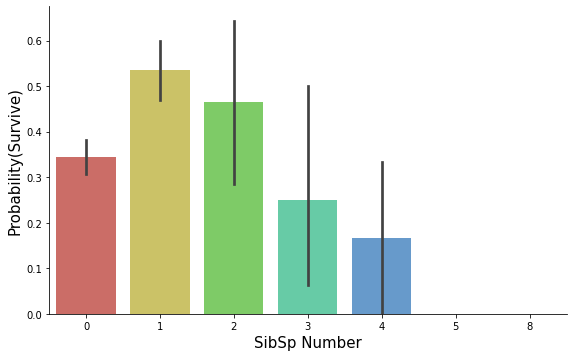

In [ ]:
g = sns.factorplot(x="SibSp",y="Survived",data=df_train,
                   kind="bar", height = 5, aspect= 1.6, palette = "hls")
g.set_ylabels("Probability(Survive)", fontsize=15)
g.set_xlabels("SibSp Number", fontsize=15)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


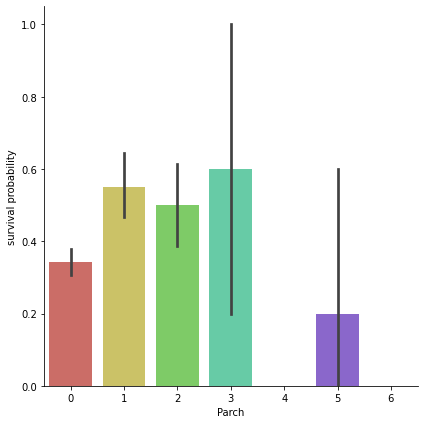

In [ ]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch",y="Survived",data=df_train, kind="bar", size = 6,palette = "hls")
g = g.set_ylabels("survival probability")

##### **So to Finish exploration I will create a new column to with families size**

In [ ]:
#Create a new column and sum the Parch + SibSp + 1 that refers the people self
df_train["FSize"] = df_train["Parch"] + df_train["SibSp"] + 1

df_test["FSize"] = df_test["Parch"] + df_test["SibSp"] + 1

Survived    0    1
FSize             
1         374  163
2          72   89
3          43   59
4           8   21
5          12    3
6          19    3
7           8    4
8           6    0
11          7    0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


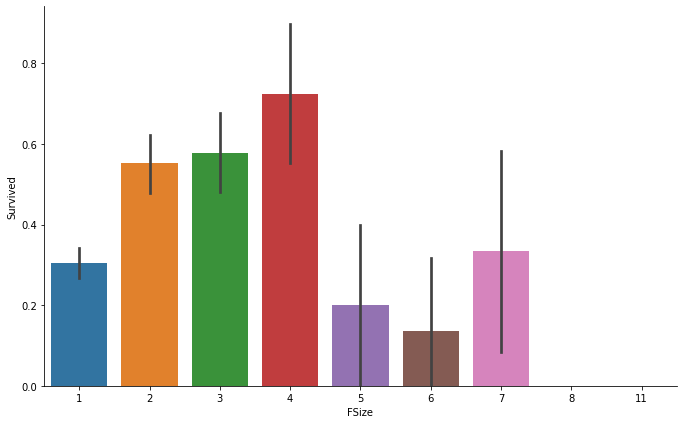

In [ ]:
print(pd.crosstab(df_train.FSize, df_train.Survived))
sns.factorplot(x="FSize",y="Survived", data=df_train, kind="bar",size=6, aspect=1.6)
plt.show()

In [ ]:
del df_train["SibSp"]
del df_train["Parch"]

del df_test["SibSp"]
del df_test["Parch"]

# **5. Preprocessing**

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_cat,Fare_cat,FSize
0,1,0,3,male,S,Mr,Student,quart_1,2
1,2,1,1,female,C,Mrs,Adult,quart_4,2
2,3,1,3,female,S,Miss,Young,quart_1,1
3,4,1,1,female,S,Mrs,Young,quart_4,2
4,5,0,3,male,S,Mr,Young,quart_2,1


In [ ]:
df_train = pd.get_dummies(df_train, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                          prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

df_test = pd.get_dummies(df_test, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                         prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

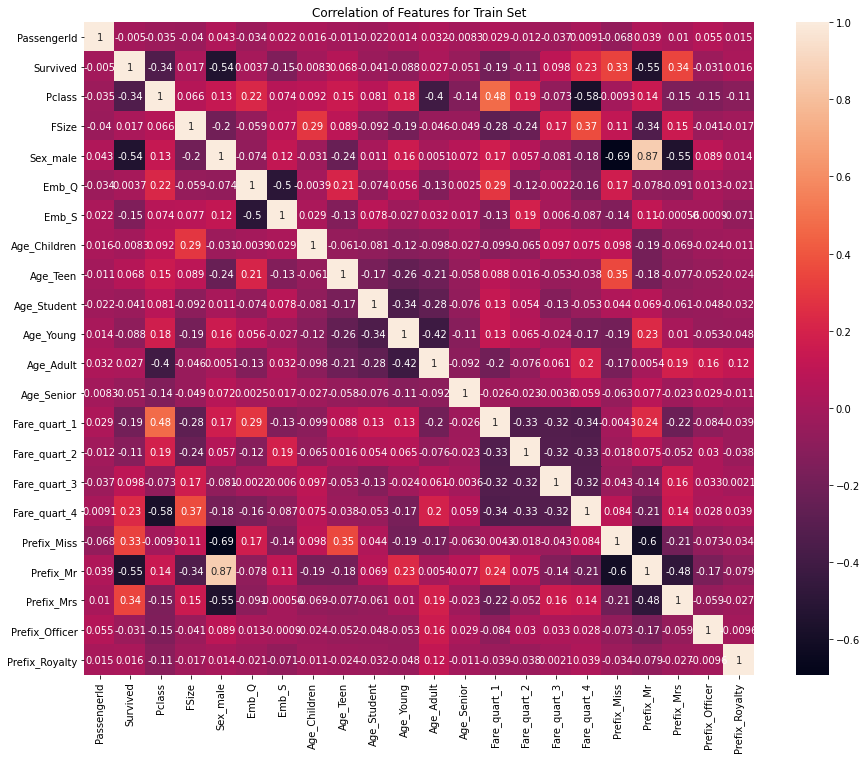

In [ ]:
#Finallt, lets look the correlation of df_train
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [ ]:
df_train.shape

(891, 22)

In [ ]:
train = df_train.drop(["Survived","PassengerId"],axis=1)
train_ = df_train["Survived"]

test_ = df_test.drop(["PassengerId"],axis=1)

X_train = train.values
y_train = train_.values

X_test = test_.values
X_test = X_test.astype(np.float64, copy=False)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **6. Modelling**

##### **Titanic survivors prediction:**
##### **a binary classification example**
Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
import graphviz

## **Anatomy of a neural network:**
As you saw in the previous chapters, training a neural network revolves around the following objects:

*   Layers, which are combined into a network (or model)
*   The input data and corresponding targets
*   The loss function, which defines the feedback signal used for learning
*   The optimizer, which determines how learning proceeds

## **Layers: the building blocks of deep learning**
##### from keras import layers
##### layer = layers.Dense(32, input_dim=data_dimension))
*   We can think of layers as the LEGO bricks of deep learning, a metaphor that is made explicit by frameworks like Keras. Building deep-learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines.
What are activation functions, and why are they necessary?
Without an activation function like relu (also called a non-linearity), the Dense layer would consist of two linear operations—a dot product and an addition:

##### output = dot(W, input) + b

So the layer could only learn linear transformations (affine transformations) of the input data: the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dimensional space.

#### **Loss functions and optimizers:**
#### **keys to configuring the learning process**
Once the network architecture is defined, you still have to choose two more things:
#### **Loss function (objective function)** - The quantity that will be minimized during training. It represents a measure of success for the task at hand.
#### **Optimizer** - Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

In [ ]:
# Creating the model
model = Sequential()

# Inputing the first layer with input dimensions
model.add(Dense(18, 
                activation='relu',  
                input_dim=20,
                kernel_initializer='uniform'))
#The argument being passed to each Dense layer (18) is the number of hidden units of the layer. 
# A hidden unit is a dimension in the representation space of the layer.

#Stacks of Dense layers with relu activations can solve a wide range of problems
#(including sentiment classification), and you’ll likely use them frequently.

# Adding an Dropout layer to previne from overfitting
model.add(Dropout(0.50))

#adding second hidden layer 
model.add(Dense(60,
                kernel_initializer='uniform',
                activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.50))

# adding the output layer that is binary [0,1]
model.add(Dense(1,
                kernel_initializer='uniform',
                activation='sigmoid'))
#With such a scalar sigmoid output on a binary classification problem, the loss
#function you should use is binary_crossentropy

#Visualizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                378       
_________________________________________________________________
dropout (Dropout)            (None, 18)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                1140      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 1,579
Trainable params: 1,579
Non-trainable params: 0
_________________________________________________________________


#### Finally, we need to choose a loss function and an optimizer.

In [ ]:
#Creating an Stochastic Gradient Descent
sgd = SGD(lr = 0.01, momentum = 0.9)

# Compiling our model
model.compile(optimizer = sgd, 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])
#optimizers list
#optimizers['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Fitting the ANN to the Training set
model.fit(X_train, y_train, 
               batch_size = 60, 
               epochs = 30, verbose=2)

Epoch 1/30
15/15 - 0s - loss: 0.6897 - accuracy: 0.5847
Epoch 2/30
15/15 - 0s - loss: 0.6798 - accuracy: 0.6162
Epoch 3/30
15/15 - 0s - loss: 0.6710 - accuracy: 0.6162
Epoch 4/30
15/15 - 0s - loss: 0.6679 - accuracy: 0.6162
Epoch 5/30
15/15 - 0s - loss: 0.6667 - accuracy: 0.6162
Epoch 6/30
15/15 - 0s - loss: 0.6656 - accuracy: 0.6162
Epoch 7/30
15/15 - 0s - loss: 0.6654 - accuracy: 0.6162
Epoch 8/30
15/15 - 0s - loss: 0.6652 - accuracy: 0.6162
Epoch 9/30
15/15 - 0s - loss: 0.6655 - accuracy: 0.6162
Epoch 10/30
15/15 - 0s - loss: 0.6648 - accuracy: 0.6162
Epoch 11/30
15/15 - 0s - loss: 0.6646 - accuracy: 0.6162
Epoch 12/30
15/15 - 0s - loss: 0.6640 - accuracy: 0.6162
Epoch 13/30
15/15 - 0s - loss: 0.6640 - accuracy: 0.6162
Epoch 14/30
15/15 - 0s - loss: 0.6630 - accuracy: 0.6162
Epoch 15/30
15/15 - 0s - loss: 0.6625 - accuracy: 0.6162
Epoch 16/30
15/15 - 0s - loss: 0.6612 - accuracy: 0.6162
Epoch 17/30
15/15 - 0s - loss: 0.6590 - accuracy: 0.6162
Epoch 18/30
15/15 - 0s - loss: 0.6577 - 

## **Predicting X_test**

In [ ]:
y_preds = model.predict(X_test)

submission = pd.read_csv("https://raw.githubusercontent.com/anhdt061091/data-science/master/gender_submission.csv", index_col='PassengerId')
submission['Survived'] = y_preds.astype(int)
submission.to_csv('Titanicoutput.csv')

## **Evaluating the model**

In [ ]:
scores = model.evaluate(X_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

30/30 [==============================] - 0s 905us/step - loss: 0.4354 - accuracy: 0.8081
accuracy: 80.81%


# **7. Validation**

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.20, 
                    epochs=180, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


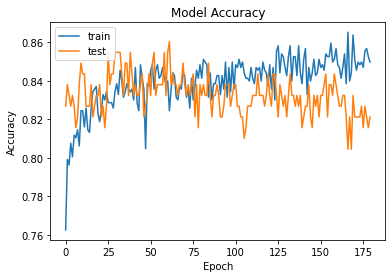

In [ ]:
# summarizing historical accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

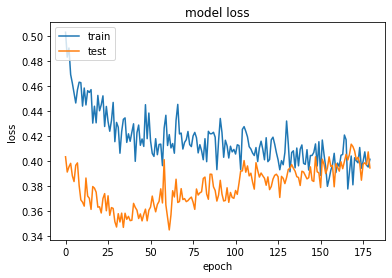

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Trying to implementing the TensorBoard to evaluate the model

callbacks = [
    keras.callbacks.TensorBoard(log_dir='my_log_dir',
                                histogram_freq=1,
                                embeddings_freq=1,
                               )
]

In [ ]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogReg: 0.829402 (+/- 0.016157)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBClassifier: 0.824914 (+/- 0.017924)
KNN: 0.782261 (+/- 0.021196)
DecisionTreeClassifier: 0.799109 (+/- 0.016348)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForestClassifier: 0.808060 (+/- 0.018106)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoostingClassifier: 0.812560 (+/- 0.017717)
RidgeClassifier: 0.818191 (+/- 0.025943)
BaggingRidgeClassifier: 0.803609 (+/- 0.020834)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ExtraTreesClassifier: 0.804714 (+/- 0.013472)


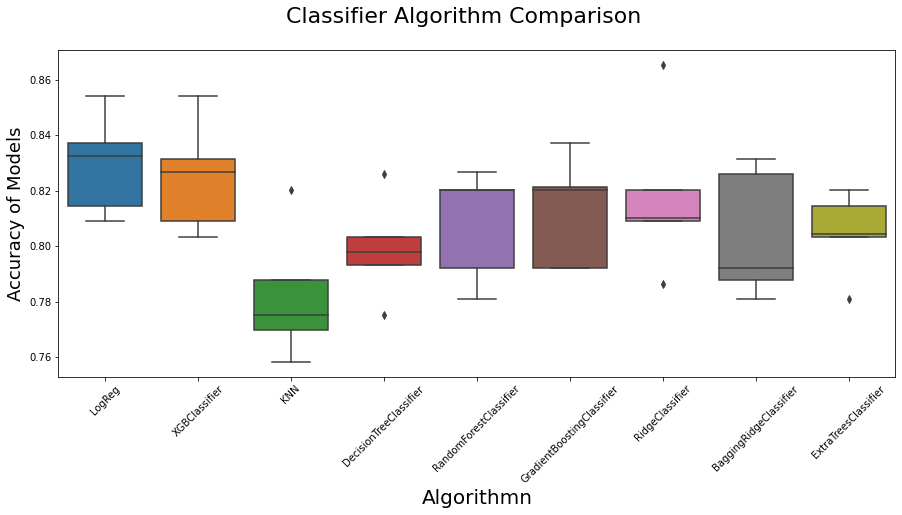

In [ ]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()